In [1]:
import os
import cv2
import numpy as np
from PIL import Image,ImageDraw
import matplotlib.pyplot as plt 
%matplotlib inline

import tensorflow as tf
import tensorflow.keras.backend as ktf
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.models import load_model,Model
from tensorflow.keras.preprocessing import image

from location.network import *
from recognition.network import *
from util import *
import cfg


# 模型载入

In [2]:
location_model = Xcep_East().xcep_east_network()
location_model.load_weights(cfg.location_weights)
#location_model.summary()

In [3]:
_, recognition_model = CRNN(cfg.width, cfg.height, cfg.label_len, cfg.characters).network()
recognition_model.load_weights(cfg.recognition_weights)
#recognition_model.summary()

# 单图测试

recognize result: -16.57
Wall time: 322 ms


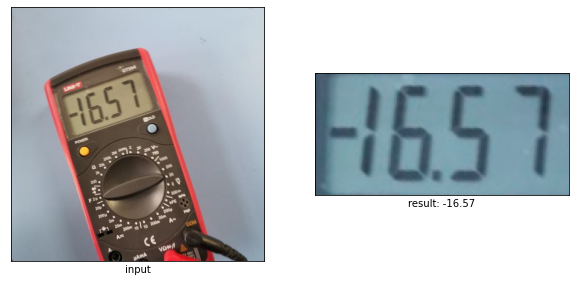

In [5]:
%%time
img_path = 'demo/314.jpg'
img = image.load_img(img_path,target_size=(512,512))
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.xlabel('input')
plt.xticks([])
plt.yticks([])
plt.imshow(img)
ims_re = location(location_model, img_path,cfg.pixel_threshold)
if(len(ims_re)>0):
    #print(len(ims_re))
    plt.subplot(1,2,2)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(ims_re[0])
    re_text = recognition(recognition_model, ims_re[0])
    result = img_path + " " + re_text + "\n"
    plt.xlabel('result: '+re_text)
    print('recognize result: '+ re_text)
        

In [10]:
img=cv2.imread('demo/046.jpg')
#darwgeo=rescaled_geo.astype(np.int32)
#print(darwgeo)
#img=cv2.polylines(img,[darwgeo],True,(0,255,0),8)
#plt.subplot(1,2,1)
#plt.imshow(img)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
#plt.subplot(1,2,2)
#plt.imshow(img)

[[171.85821658 262.18276664]
 [203.09321288 313.77952101]
 [268.83950467 271.73772932]
 [243.60694674 217.16745184]]
[[171 262]
 [203 313]
 [268 271]
 [243 217]]


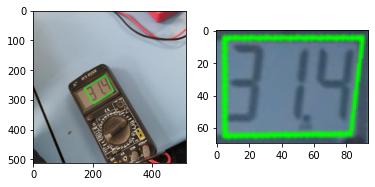

In [11]:
x = preprocess_input(img,mode='tf')
x = np.expand_dims(x, axis=0)
y = location_model.predict(x)
y = np.squeeze(y, axis=0)
y[:, :, :3] = tf.nn.sigmoid(y[:, :, :3])
cond = np.greater_equal(y[:, :, 0], cfg.pixel_threshold)
activation_pixels = np.where(cond)
quad_scores, quad_after_nms = nms(y, activation_pixels)
for score, geo, s in zip(quad_scores, quad_after_nms,range(len(quad_scores))):
    if np.amin(score) > 0:
        rescaled_geo = geo / [1, 1]
        print(rescaled_geo)
        #im = cv2.cvtColor(np.asarray(im), cv2.COLOR_RGB2BGR)
        #img = crop_rectangle(img, rescaled_geo)
        #plt.imshow(img)
        darwgeo=rescaled_geo.astype(np.int32)
        print(darwgeo)
        img=cv2.polylines(img,[darwgeo],True,(0,255,0),2)
        results=[]
        #rescaled_geo = geo / [scale_ratio_w, scale_ratio_h]
        rescaled_geo = geo
        #im = cv2.cvtColor(np.asarray(im), cv2.COLOR_RGB2BGR)
        darwgeo=rescaled_geo.astype(np.int32)
        img=cv2.polylines(img,[darwgeo],True,(0,255,0),2)
        plt.subplot(1,2,1)
        plt.imshow(img)

        imgx= img
        imgx = cv2.cvtColor(imgx, cv2.COLOR_RGB2BGR)
        imcrop = crop_rectangle(imgx, rescaled_geo)
        results.append(imcrop)
        #if(len(results)>0):
        plt.subplot(1,2,2)
        plt.imshow(imcrop)
        re_text = recognition(recognition_model, imcrop)
        cv2.putText(img,'value:'+re_text,org=(100,50),                      fontFace=cv2.FONT_HERSHEY_SIMPLEX,fontScale=1,
                    color=(255,0,0),thickness=2,                                lineType=cv2.LINE_AA) 
            #print('recognize result: '+ re_text)
     

In [26]:
geo[]

array([[  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [437.73099381, 528.06435247],
       [474.7192524 , 449.04710818]])

In [ ]:
img = cv2.imread('demo/046.jpg')
#cv2.namedWindow("window")
img = cv2.resize(img,(512,512))
cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
#ims_re = location(location_model, img_path,cfg.pixel_threshold)
#d_wight, d_height = resize_image(img, cfg.image_size)

#img = img.resize((d_wight, d_height), Image.NEAREST).convert('RGB')
#img = image.img_to_array(img)
x = preprocess_input(img,mode='tf')
x = np.expand_dims(x, axis=0)
y = location_model.predict(x)
y = np.squeeze(y, axis=0)
y[:, :, :3] = tf.nn.sigmoid(y[:, :, :3])
cond = np.greater_equal(y[:, :, 0], cfg.pixel_threshold)
activation_pixels = np.where(cond)
quad_scores, quad_after_nms = nms(y, activation_pixels)
results=[]
for score, geo, s in zip(quad_scores, quad_after_nms,range(len(quad_scores))):
    if np.amin(score) > 0:

        #rescaled_geo = geo / [scale_ratio_w, scale_ratio_h]
        rescaled_geo = geo
        #im = cv2.cvtColor(np.asarray(im), cv2.COLOR_RGB2BGR)
        darwgeo=rescaled_geo.astype(np.int32)
        img=cv2.polylines(img,[darwgeo],True,(0,255,0),4)
        #cv2.imshow('window',img)

        imcrop = crop_rectangle(img, rescaled_geo)
        results.append(imcrop)
if(len(results)>0):
    re_text = recognition(recognition_model, results[0])
    cv2.putText(img,'value:'+re_text,org=(100,50),fontFace=cv2.FONT_HERSHEY_SIMPLEX,fontScale=1,
            color=(255,0,0),thickness=3,lineType=cv2.LINE_AA) 
plt.imshow(img)
#cv2.imshow("window", img)

1
demo/311.jpg 30.8

Wall time: 356 ms


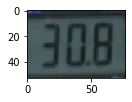

In [24]:
%%time
if(len(ims_re)>0):
    print(len(ims_re))
    plt.subplot(1,3,2)
    plt.imshow(ims_re[0])
    re_text = recognition(recognition_model, ims_re[0])
    result = img_path + " " + re_text + "\n"
    print(result)

In [4]:
east_detect=location_model
img_path ='demo/046.jpg'
pixel_threshold=cfg.pixel_threshold
img = image.load_img(img_path)
d_wight, d_height = resize_image(img, cfg.image_size)
img = img.resize((d_wight, d_height), Image.NEAREST).convert('RGB')
img = image.img_to_array(img)
img = preprocess_input(img, mode='tf')
x = np.expand_dims(img, axis=0)
y = east_detect.predict(x)
y = np.squeeze(y, axis=0)
y[:, :, :3] = tf.math.sigmoid(y[:, :, :3])
cond = np.greater_equal(y[:, :, 0], pixel_threshold)
activation_pixels = np.where(cond)
quad_scores, quad_after_nms = nms(y, activation_pixels)

In [5]:
quad_after_nms

array([[[171.85821658, 262.18276664],
        [203.09321288, 313.77952101],
        [268.83950467, 271.73772932],
        [243.60694674, 217.16745184]],

       [[  0.        ,   0.        ],
        [  0.        ,   0.        ],
        [  0.        ,   0.        ],
        [  0.        ,   0.        ]],

       [[  0.        ,   0.        ],
        [  0.        ,   0.        ],
        [437.73099381, 528.06435247],
        [474.7192524 , 449.04710818]]])

[[171.85821658 262.18276664]
 [203.09321288 313.77952101]
 [268.83950467 271.73772932]
 [243.60694674 217.16745184]]
[[171.85821658 262.18276664]
 [203.09321288 313.77952101]
 [268.83950467 271.73772932]
 [243.60694674 217.16745184]]


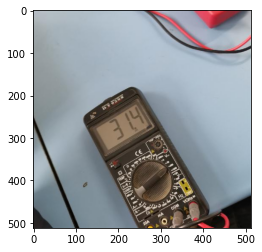

In [27]:
with Image.open(img_path) as im:
    im_array = image.img_to_array(im.convert('RGB'))
    d_wight, d_height = resize_image(im, cfg.image_size)
    scale_ratio_w = d_wight / im.width
    scale_ratio_h = d_height / im.height
    im = im.resize((d_wight, d_height), Image.NEAREST).convert('RGB')
    quad_im = im.copy()
    plt.imshow(quad_im)
    quad_draw = ImageDraw.Draw(quad_im)
    #plt.imshow(quad_draw)
    txt_items = []
    for score, geo, s in zip(quad_scores, quad_after_nms,range(len(quad_scores))):
        if np.amin(score) > 0:
            print(geo)
            quad_draw.line([tuple(geo[0]),
                            tuple(geo[1]),
                            tuple(geo[2]),
                            tuple(geo[3]),
                            tuple(geo[0])], width=2, fill='blue')
            rescaled_geo = geo / [scale_ratio_w, scale_ratio_h]
            rescaled_geo_list = np.reshape(rescaled_geo, (8,)).tolist()
            txt_item = ','.join(map(str, rescaled_geo_list))
            txt_items.append(txt_item + '\n')
            print(rescaled_geo)
            img_crop = crop_rectangle(im_array, rescaled_geo)
            #cv2.imwrite(os.path.join('output_crop', img_path.split('/')[-1].split('.')[0] + '.jpg'), img_crop)
            #plt.imshow(img_crop[:,:,::-1]/255)
            #plt.imshow(quad_im)


In [ ]:
try:
    with Image.open(img_path) as im:
        im_array = image.img_to_array(im.convert('RGB'))
        d_wight, d_height = resize_image(im, cfg.image_size)
        scale_ratio_w = d_wight / im.width
        scale_ratio_h = d_height / im.height
        im = im.resize((d_wight, d_height), Image.NEAREST).convert('RGB')
        quad_im = im.copy()
        quad_draw = ImageDraw.Draw(quad_im)
        txt_items = []
        flag = False
        for score, geo, s in zip(quad_scores, quad_after_nms,range(len(quad_scores))):
            if np.amin(score) > 0:
                flag = True
                quad_draw.line([tuple(geo[0]),
                                tuple(geo[1]),
                                tuple(geo[2]),
                                tuple(geo[3]),
                                tuple(geo[0])], width=2, fill='blue')
                rescaled_geo = geo / [scale_ratio_w, scale_ratio_h]
                rescaled_geo_list = np.reshape(rescaled_geo, (8,)).tolist()
                txt_item = ','.join(map(str, rescaled_geo_list))
                txt_items.append(txt_item + '\n')
                if cfg.detection_box_crop:
                    img_crop = crop_rectangle(im_array, rescaled_geo)
                    if not os.path.exists('output_crop'):
                        os.mkdir('output_crop')
                    cv2.imwrite(os.path.join('output_crop', img_path.split('/')[-1].split('.')[0] + '.jpg'), img_crop)
            elif not quiet:
                print('quad invalid with vertex num less then 4.')
        if flag:
            if not os.path.exists('output'):
                os.mkdir('output')
            quad_im.save(os.path.join('output', img_path.split('/')[-1].split('.')[0] + '_predict.jpg'))
        if cfg.predict_write2txt and len(txt_items) > 0:
            if not os.path.exists('output_txt'):
                os.mkdir('output_txt')
            with open(os.path.join("output_txt", img_path.split('/')[-1].split('.')[0] + '.txt'), 'w') as f_txt:
                f_txt.writelines(txt_items)
except:
    print(img_path+'  open error')

In [13]:
%%time
imgs = os.listdir('demo')
for img in imgs:
    img_path = os.path.join('demo', img)
    ims_re = location(location_model, img_path, cfg.pixel_threshold)
    if len(ims_re) > 0:
        for i in range(len(ims_re)):
            re_text = recognition(recognition_model, ims_re[0])
            result = img + " " + re_text + "\n"
            print(result)

Wall time: 2.84 s


# 全数据集测试

# 准确率计算

In [8]:
labels = 'labels.txt'
def acc_calculate(labels='labels.txt',results='result.txt'):
    with open(labels) as label:
        linexs = label.readlines()
    with open(results) as result:
        lineys = result.readlines()
    cnt = 0
    for linex in linexs:
        linex = linex.split()
        for liney in lineys:
            liney = liney.split()
            if linex[0] == liney[0] and len(liney) > 1:
                if linex[1] == liney[1]:
                    cnt = cnt + 1
    acc=cnt/len(lineys)
    return  acc

# 检测测试

## 训练集

In [26]:
%%time
results='east_train_result.txt'
with open(results, 'w+') as txt:
    with open(r'Z:\Code\Python\datas\Augment_meter\east_train.txt') as val:
        lines =val.readlines()
        for line in lines:
            img_name=line.split(',')[0]
            img_path=os.path.join('Z:\Code\Python\datas\Augment_meter\imgs_east_512',img_name)
            ims_re = location(location_model, img_path, cfg.pixel_threshold)
            if len(ims_re) > 0:
                re_text = recognition(recognition_model, ims_re[0])
                result =  img_name+ " " + re_text + "\n"
                #print(result)
                txt.write(result)

Wall time: 4min 42s


In [27]:
acc=acc_calculate(labels,results)
print('{0:.3%}'.format(acc))

98.098%


## 验证集

In [28]:
results='east_val_result.txt'

In [30]:
%%time
with open(results, 'w+') as txt:
    with open(r'Z:\Code\Python\datas\Augment_meter\east_val.txt') as val:
        lines =val.readlines()
        for line in lines:
            img_name=line.split(',')[0]
            img_path=os.path.join('Z:\Code\Python\datas\Augment_meter\imgs_east_512',img_name)
            ims_re = location(location_model, img_path, cfg.pixel_threshold)
            if len(ims_re) > 0:
                for i in range(len(ims_re)):
                    re_text = recognition(recognition_model, ims_re[i])
                    result =  img_name+ " " + re_text + "\n"
                    print(result)
                    txt.write(result)

366_aug.jpg -29.8

810.jpg 16.2

155_aug.jpg 16.0

979.jpg 13.7

613_aug.jpg -31.4

478_aug.jpg -03.9

250.jpg 22.8

655_aug.jpg -17.5

681_aug.jpg -10.5

743.jpg 23.1

778.jpg 29.4

083_aug.jpg 15.2

363.jpg -29.9

023.jpg 8.51

610_aug.jpg -31.0

787.jpg 26.3

055_aug.jpg 11.1

379_aug.jpg -28.0

677_aug.jpg -11.3

592_aug.jpg -28.4

386_aug.jpg -27.9

268.jpg 24.0

796_aug.jpg 23.4

070_aug.jpg 11.9

880.jpg 04.7

391.jpg -27.2

885.jpg 06.2

406.jpg -13.7

633_aug.jpg -26.4

929_aug.jpg 28.8

419.jpg 12.2

216_aug.jpg 28.1

514.jpg -00.1

661.jpg 15.2

984_aug.jpg 08.6

950.jpg 24.2

286.jpg -15.96

063.jpg 10.9

444_aug.jpg -08.2

951.jpg 24.0

358.jpg -30.6

113.jpg 21.2

809_aug.jpg 16.4

773.jpg 31.6

509.jpg -00.4

706.jpg -01.3

154.jpg 16.1

960_aug.jpg 19.5

274.jpg -3.97

169_aug.jpg 37.8

932_aug.jpg 30.6

017_aug.jpg 1.1

882_aug.jpg 05.5

670_aug.jpg -12.8

660_aug.jpg -15.7

919_aug.jpg 23.9

991_aug.jpg 05.8

744_aug.jpg 23.3

816_aug.jpg 14.5

705_aug.jpg -01.6

510_

In [31]:
acc=acc_calculate(labels,results)
print('{0:.3%}'.format(acc))

96.907%


# 识别测试

## 训练集

In [32]:
%%time
results='crnn_train_result.txt'
with open(results, 'w+') as txt:
    with open(r'Z:\Code\Python\datas\Augment_meter\crnn_train.txt') as val:
        lines =val.readlines()
        for line in lines:
            img_name=line.split(' ')[0]
            img_path=os.path.join('Z:\Code\Python\datas\Augment_meter\imgs_east_512',img_name)
            ims_re = location(location_model, img_path, cfg.pixel_threshold)
            if len(ims_re) > 0:
                re_text = recognition(recognition_model, ims_re[0])
                result =  img_name+ " " + re_text + "\n"
                print(result)
                txt.write(result)

205.jpg 33.4

975_aug.jpg 10.7

033.jpg 5.51

543_aug.jpg -10.8

098.jpg 16.6

386_aug.jpg -27.9

224_aug.jpg 29.9

991.jpg 05.8

433.jpg -09.7

616_aug.jpg -31.9

736.jpg 21.4

710_aug.jpg -02.9

594.jpg -28.7

640_aug.jpg -25.8

759_aug.jpg 28.1

707_aug.jpg -00.9

328_aug.jpg 16.5

650.jpg -20.7

783_aug.jpg 27.5

339.jpg 09.4

724_aug.jpg .19

818.jpg 14.1

235.jpg 27.2

070_aug.jpg 11.9

178_aug.jpg 17.8

729_aug.jpg 19.9

517.jpg -00.9

131.jpg 18.8

106.jpg 18.6

735.jpg 21.4

491.jpg -03.2

279_aug.jpg -5.18

386.jpg -27.9

219_aug.jpg 27.0

370_aug.jpg -29.6

277_aug.jpg 20.3

602.jpg -29.7

113.jpg 21.2

191.jpg 34.8

066.jpg 11.6

260_aug.jpg -2.20

457.jpg 01.8

605_aug.jpg -30.2

691.jpg -07.4

095.jpg 30.7

649.jpg -21.1

770_aug.jpg 31.9

560.jpg -17.8

074_aug.jpg 12.7

113_aug.jpg 21.2

154.jpg 16.1

491_aug.jpg -03.2

508.jpg -00.6

781_aug.jpg 28.6

850_aug.jpg 07.3

933_aug.jpg 31.0

436_aug.jpg -09.1

204.jpg 33.7

281.jpg -5.30

401_aug.jpg -25.9

403_aug.jpg -14.

889_aug.jpg 07.8

003_aug.jpg 11.01

803_aug.jpg 21.0

304.jpg 30.8

895.jpg 09.7

807.jpg 17.9

922_aug.jpg 24.6

166.jpg 14.3

038.jpg 4.50

372.jpg -29.5

213_aug.jpg 32.4

884.jpg 06.1

432_aug.jpg -09.8

727.jpg 19.1

750.jpg 24.4

987_aug.jpg 07.8

505.jpg -01.7

602_aug.jpg -29.7

241_aug.jpg 25.3

316.jpg -16.57

511.jpg -00.2

593_aug.jpg -28.6

879_aug.jpg 04.5

109.jpg 20.6

871.jpg 00.9

477.jpg -04.6

311.jpg 30.8

323.jpg -16.67

274_aug.jpg -3.97

009.jpg 10.20

353_aug.jpg -22.8

633_aug.jpg -26.4

692.jpg -06.8

249.jpg 23.3

879.jpg 04.5

683_aug.jpg -09.9

898.jpg 11.1

111.jpg 20.8

780.jpg 29.0

755.jpg 26.2

642.jpg -25.4

360.jpg 03.8

105.jpg 18.0

618.jpg -31.5

636_aug.jpg -26.3

302_aug.jpg 30.8

024.jpg 27.4

697.jpg -04.7

213.jpg 32.4

441_aug.jpg -08.3

443.jpg 01.1

612_aug.jpg -31.2

876.jpg 03.0

578.jpg -23.4

952_aug.jpg 01.0

164_aug.jpg 37.7

790_aug.jpg 25.0

440_aug.jpg -08.4

482_aug.jpg -03.2

645_aug.jpg -21.8

822.jpg 13.2

098_aug.jpg 16.6



731.jpg 20.2

160.jpg 04.0

776.jpg 30.3

344.jpg 31.9

428_aug.jpg .19

192_aug.jpg 34.9

514.jpg -00.1

970_aug.jpg 13.3

114_aug.jpg 30.0

371.jpg -29.5

784.jpg 27.4

648.jpg -21.2

619.jpg -31.2

769_aug.jpg 31.6

864.jpg 02.8

056.jpg 0.90

409_aug.jpg -13.6

897.jpg 10.8

155.jpg 16.0

008.jpg 10.41

733_aug.jpg 31.9

659.jpg -15.7

380_aug.jpg -28.0

574_aug.jpg -22.4

462.jpg -06.3

133_aug.jpg 19.7

249_aug.jpg 23.3

118.jpg 27.3

060.jpg 2.20

199.jpg 34.3

515_aug.jpg -00.2

081.jpg 14.8

838.jpg 10.3

887_aug.jpg 07.1

236.jpg 26.8

972_aug.jpg 12.5

988_aug.jpg 06.6

563_aug.jpg -19.0

540.jpg -09.8

504.jpg -01.7

175_aug.jpg 36.5

738_aug.jpg 21.9

547_aug.jpg -12.2

646_aug.jpg -21.8

620.jpg -31.1

756_aug.jpg 26.6

693_aug.jpg -06.7

026_aug.jpg 31.8

273_aug.jpg -3.79

855.jpg 06.2

968.jpg 14.6

788_aug.jpg 25.7

704.jpg -01.8

417_aug.jpg -12.4

337.jpg 10.9

883_aug.jpg 05.6

520.jpg -02.3

553_aug.jpg -19.9

498.jpg -02.6

222.jpg 12.8

411_aug.jpg -13.3

161.jp

031_aug.jpg 6.40

397.jpg 01.4

356_aug.jpg -30.8

805.jpg 18.2

744.jpg 23.3

986.jpg 07.8

129_aug.jpg 16.0

690_aug.jpg -07.5

718_aug.jpg -07.3

092_aug.jpg 16.1

790.jpg 25.0

653_aug.jpg -19.2

463.jpg -06.3

126.jpg 27.7

748_aug.jpg 24.0

705_aug.jpg -01.6

196.jpg 10.9

534.jpg -07.5

532_aug.jpg -06.7

335.jpg 12.8

368.jpg -29.6

932.jpg 30.6

352.jpg -18.14

094.jpg 30.6

535.jpg -07.6

753_aug.jpg 26.0

920.jpg 23.7

254_aug.jpg 21.9

011_aug.jpg 31.5

400_aug.jpg -25.9

267.jpg 29.8

937.jpg 31.7

387_aug.jpg -27.5

677.jpg -11.3

145.jpg 28.0

393_aug.jpg -26.8

352_aug.jpg -18.14

985.jpg 08.0

976_aug.jpg 10.7

772_aug.jpg 31.9

340_aug.jpg 08.6

208.jpg 32.9

452.jpg 01.8

935_aug.jpg 31.9

391.jpg -27.2

139.jpg 26.9

014.jpg 9.41

115_aug.jpg 24.7

874.jpg 02.5

366.jpg -29.8

Wall time: 4min 12s


In [33]:
acc=acc_calculate(labels,results)
print('{0:.3%}'.format(acc))

98.259%


## 验证集

In [18]:
%%time
results='crnn_val_result.txt'
with open(results, 'w+') as txt:
    with open(r'Z:\Code\Python\datas\Augment_meter\crnn_val.txt') as val:
        lines =val.readlines()
        for line in lines:
            img_name=line.split(' ')[0]
            img_path=os.path.join('Z:\Code\Python\datas\Augment_meter\imgs_east_512',img_name)
            ims_re = location(location_model, img_path, cfg.pixel_threshold)
            if len(ims_re) > 0:
                for i in range(len(ims_re)):
                    re_text = recognition(recognition_model, ims_re[i])
                    result =  img_name+ " " + re_text + "\n"
                    print(result)
                    txt.write(result)

096.jpg 30.3

046_aug.jpg 31.4

580_aug.jpg -24.6

297.jpg -16.11

658_aug.jpg 16.8

211.jpg 03.2

684_aug.jpg -09.6

445.jpg -08.0

778.jpg 29.4

470.jpg -05.7

274.jpg -3.97

917.jpg 22.8

040.jpg 31.5

522_aug.jpg -02.8

299.jpg -16.11

453_aug.jpg -07.7

710.jpg -02.9

826_aug.jpg 12.2

692_aug.jpg -06.8

858.jpg 05.1

687.jpg -08.5

850.jpg 07.3

303.jpg -16.38

971_aug.jpg 12.8

869.jpg 01.0

448.jpg -07.7

852.jpg 07.2

944.jpg 27.8

358_aug.jpg -30.6

256.jpg 21.0

080.jpg 14.5

282_aug.jpg -5.59

076_aug.jpg 13.3

760_aug.jpg 31.5

369_aug.jpg -29.6

530.jpg -06.1

240.jpg 25.8

406.jpg -13.7

490_aug.jpg -02.8

280.jpg -5.19

668_aug.jpg -13.4

910_aug.jpg 18.7

925.jpg 26.8

966.jpg 16.2

227_aug.jpg 29.2

714_aug.jpg -05.3

737_aug.jpg 21.7

054.jpg .50

605.jpg -30.2

272.jpg 21.9

079.jpg 14.4

480.jpg -03.2

284.jpg -5.98

658.jpg -16.8

666.jpg -13.7

264.jpg -2.89

712_aug.jpg -04.5

440.jpg -08.4

835.jpg 10.5

157.jpg 18.7

792.jpg 24.6

773_aug.jpg 31.6

269_aug.jpg

In [19]:
acc=acc_calculate(labels,results)
print('{0:.3%}'.format(acc))

97.692%


# 文件夹中图片测试

In [25]:
%%time
results='demo.txt'
with open(results, 'w+') as txt:
    imgs = os.listdir('demo')
    for img in imgs:
        img_path = os.path.join('demo', img)
        ims_re = location(location_model, img_path, cfg.pixel_threshold)
        if len(ims_re) > 0:
            for i in range(len(ims_re)):
                re_text = recognition(recognition_model, ims_re[i])
                result = img + " " + re_text + "\n"
                print(result)
                txt.write(result)

000_mask1.jpg 11.01

000_mask2.jpg 11.01

000_mask3.jpg 11.01

000_mask4.jpg 11.01

000_mask5.jpg 11.01

039_aug.jpg 4.40

042_aug.jpg 3.80

043_aug.jpg 3.80

045_aug.jpg 3.30

046.jpg 31.4

142.jpg 31.9

268.jpg 24.0

271_aug.jpg 22.0

310_aug.jpg -16.36

311.jpg 30.8

313_aug.jpg 31.1

314.jpg -16.57

576_aug.jpg -22.8

578_aug.jpg -23.4

583_aug.jpg -25.9

802_aug.jpg 21.6

812_aug.jpg 15.2

900_aug.jpg 13.4

920.jpg 23.7

922_aug.jpg 24.6

Wall time: 4.5 s


In [24]:
acc=acc_calculate(labels,results)
print('{0:.3%}'.format(acc))                

039_aug.jpg 4.40

042_aug.jpg 3.80

043_aug.jpg 3.80

045_aug.jpg 3.30

046.jpg 31.4

142.jpg 31.9

268.jpg 24.0

271_aug.jpg 22.0

310_aug.jpg -16.36

311.jpg 30.8

313_aug.jpg 31.1

314.jpg -16.57

576_aug.jpg -22.8

578_aug.jpg -23.4

583_aug.jpg -25.9

802_aug.jpg 21.6

812_aug.jpg 15.2

900_aug.jpg 13.4

920.jpg 23.7

922_aug.jpg 24.6

100.000%
Wall time: 3.28 s
